<a href="https://colab.research.google.com/github/Rahafzsh/PlanetsDetectionYOLOv8/blob/main/planets_detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Planets Detection using YOLOv8:

This Project from (TFA2 - Group 1) done by:
* Rahaf AL-Shammari
* Abeer Alsaeed 
* Azzah Al-Ghamdi

## Introduction: 

In these days of technological advancement, computer vision is fundamental to the use of artificial intelligence to gather and process image data, allow machines to understand it, and utilize it to automate actions. There are several examples of computer vision applications that we can use in health to detect some skin diseases and generate new images. Also, it can be used in the astronomy field to enable astronomers to deal with sophisticated image processing and analysis issues. Furthermore, Roboflow is a powerful tool that mitigates computer vision tasks by providing developers with the space to build their own CV models.

## Project Goals and Objectives: 

using Computer Vision in Astronomy and Space can easies a lot of manual tasks by building an Artificial Intelligence models like object detection  

## Dataset Description:

Text here 

In [1]:
!nvidia-smi

Wed May 22 15:11:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

import glob
import matplotlib.pyplot as plt
from PIL import Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/201.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Download data:

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="rhxMN5STedhJ1DXhkEln")
project = rf.workspace("college-qcgpx").project("planet-detection")
version = project.version(10)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 985.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Planet-Detection-10 in yolov8:: 100%|██████████| 8342/8342 [00:01<00:00, 5740.18it/s]


## Model Development and Training:

Text here 

## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=416 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 147MB/s] 
New https://pypi.org/project/ultralytics/8.2.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Planet-Detection-10/data.yaml, epochs=50, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, st

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1716390824.bd40a8f9890d.1195.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch9120.jpg  weights
P_curve.png					    train_batch9121.jpg
PR_curve.png					    train_batch9122.jpg


## Evaluation and Analysis: 

Text here

/content


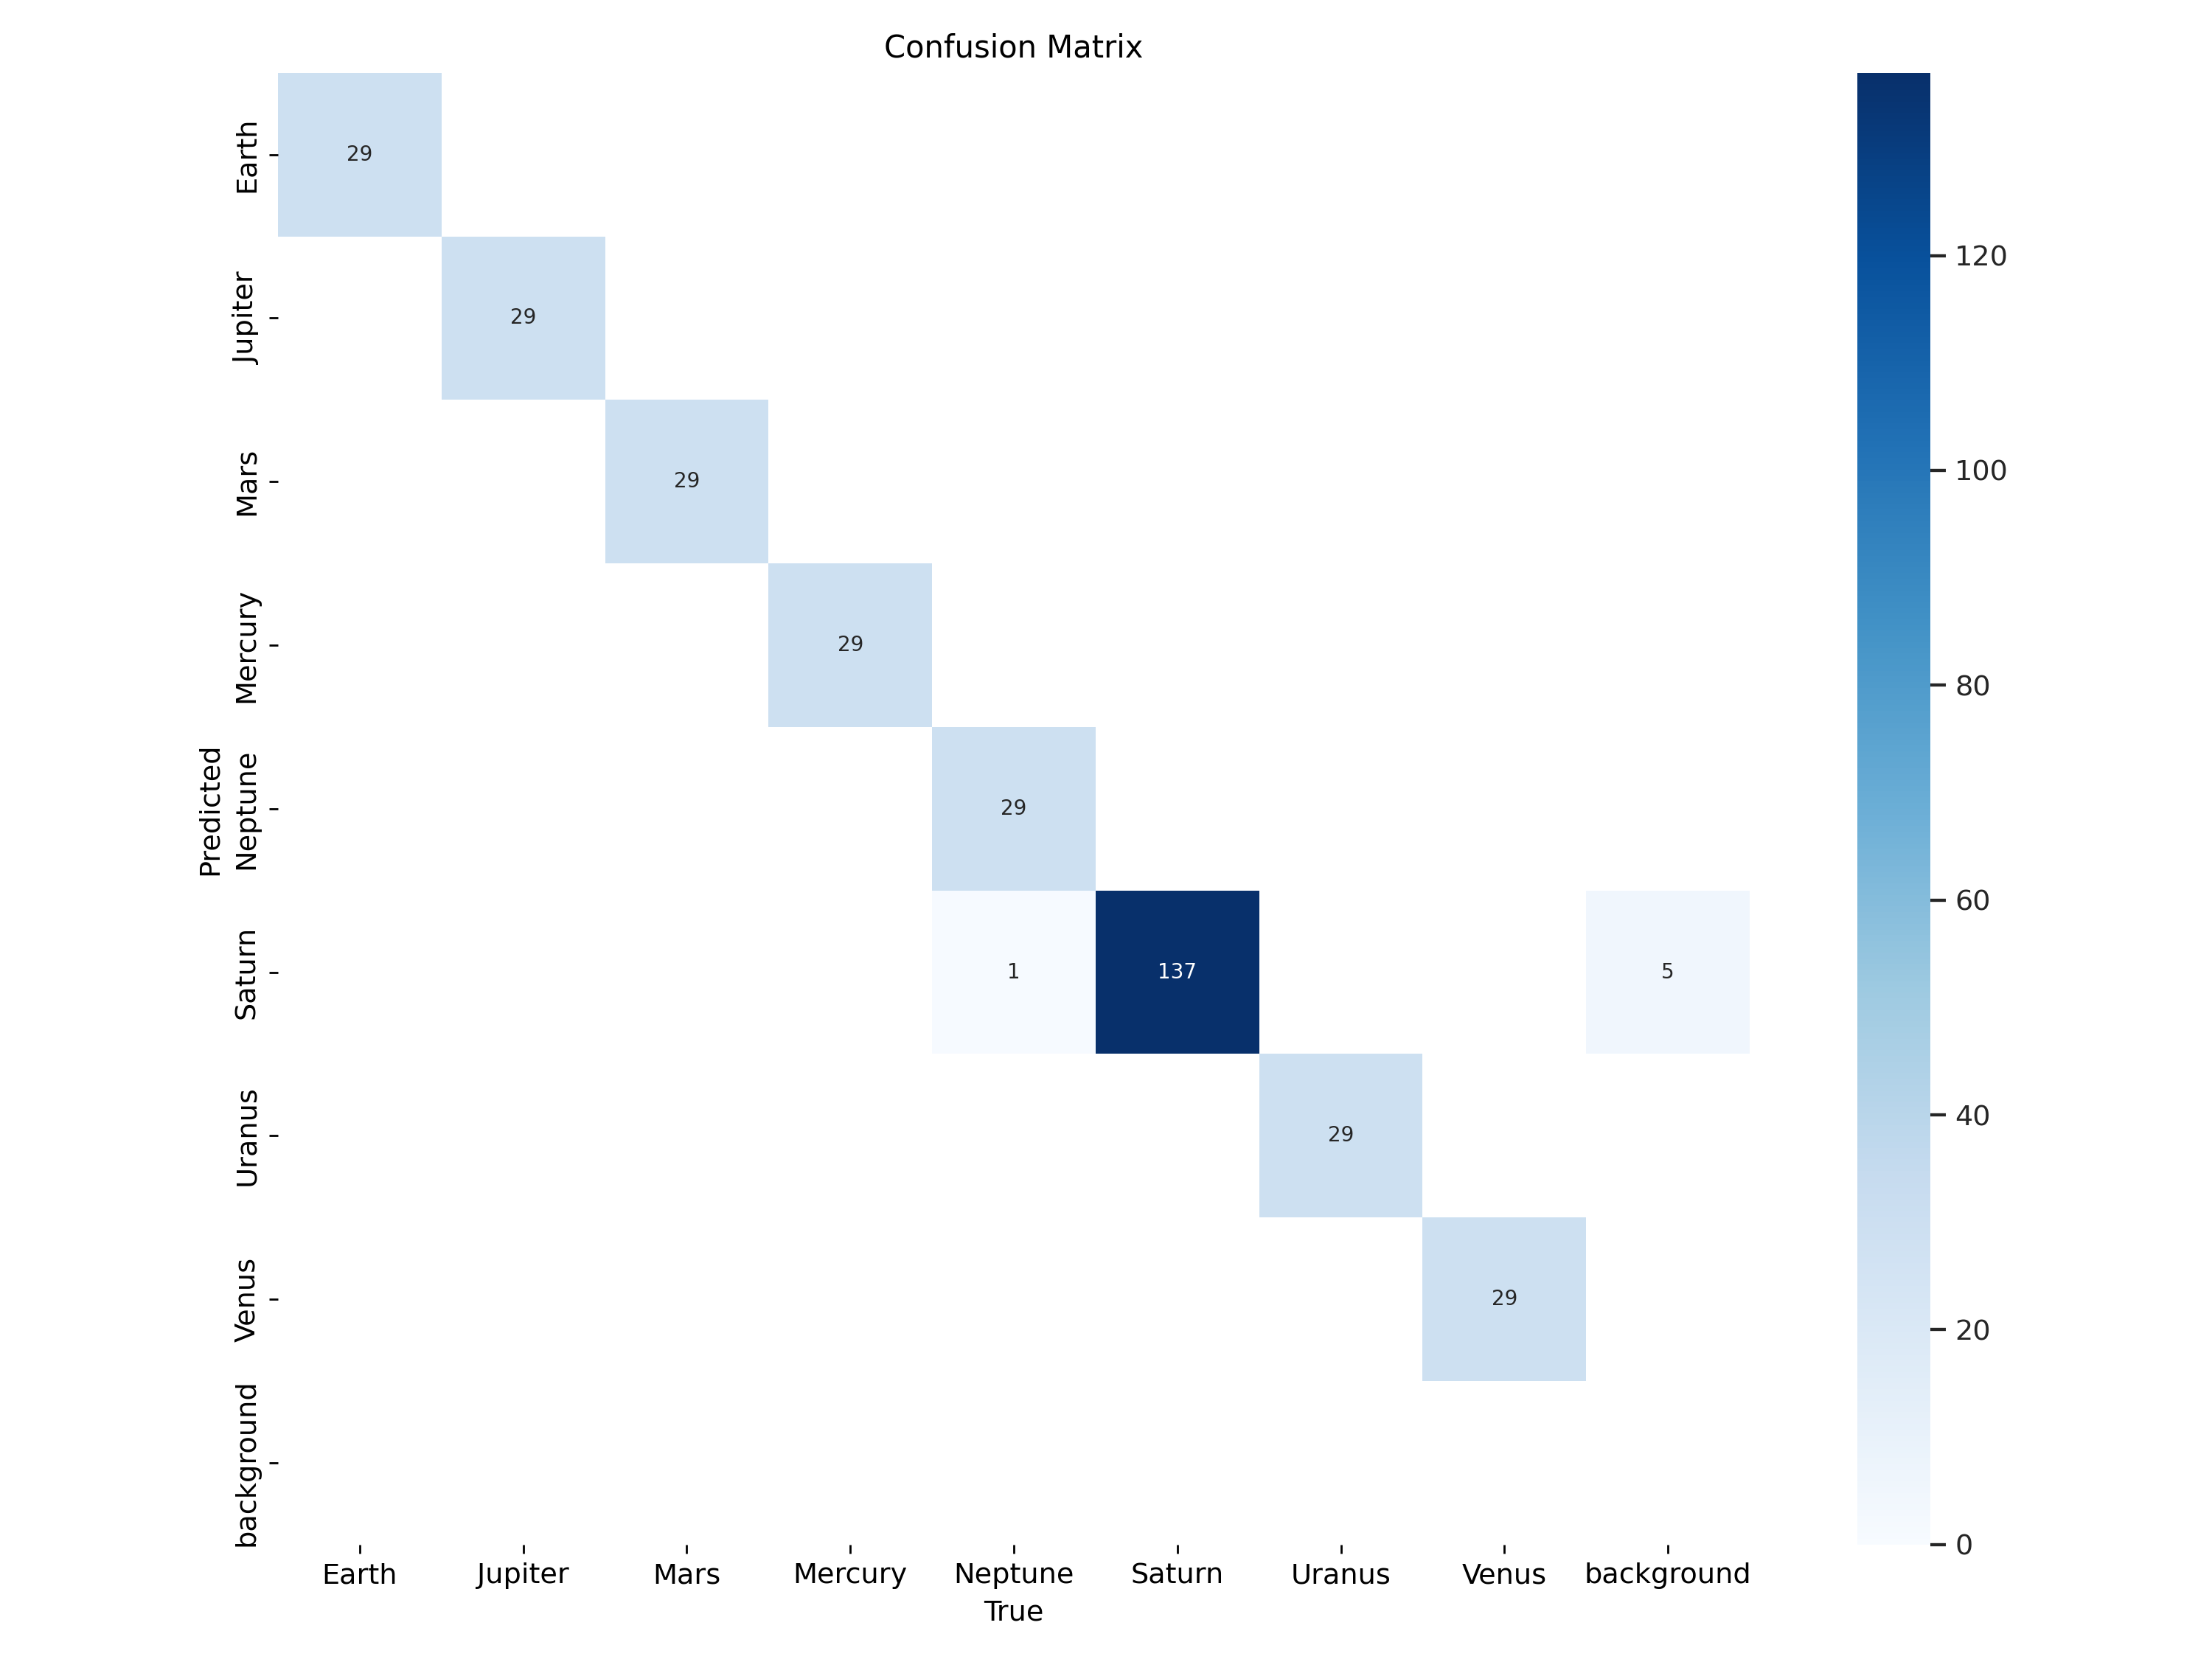

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [9]:
# Load a model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Planet-Detection-10/valid/labels.cache... 341 images, 0 backgrounds, 0 corrupt: 100%|██████████| 341/341 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.98it/s]
                   all        341        341      0.989      0.996      0.993      0.988
                 Earth        341         29      0.982          1      0.995      0.989
               Jupiter        341         29      0.981          1      0.995      0.995
                  Mars        341         29      0.981          1      0.995      0.995
               Mercury        341         29          1          1      0.995      0.995
               Neptune        341         30          1      0.967      0.983      0.983
     

array([    0.98853,       0.995,       0.995,       0.995,       0.983,     0.95718,       0.995,       0.995])

/content


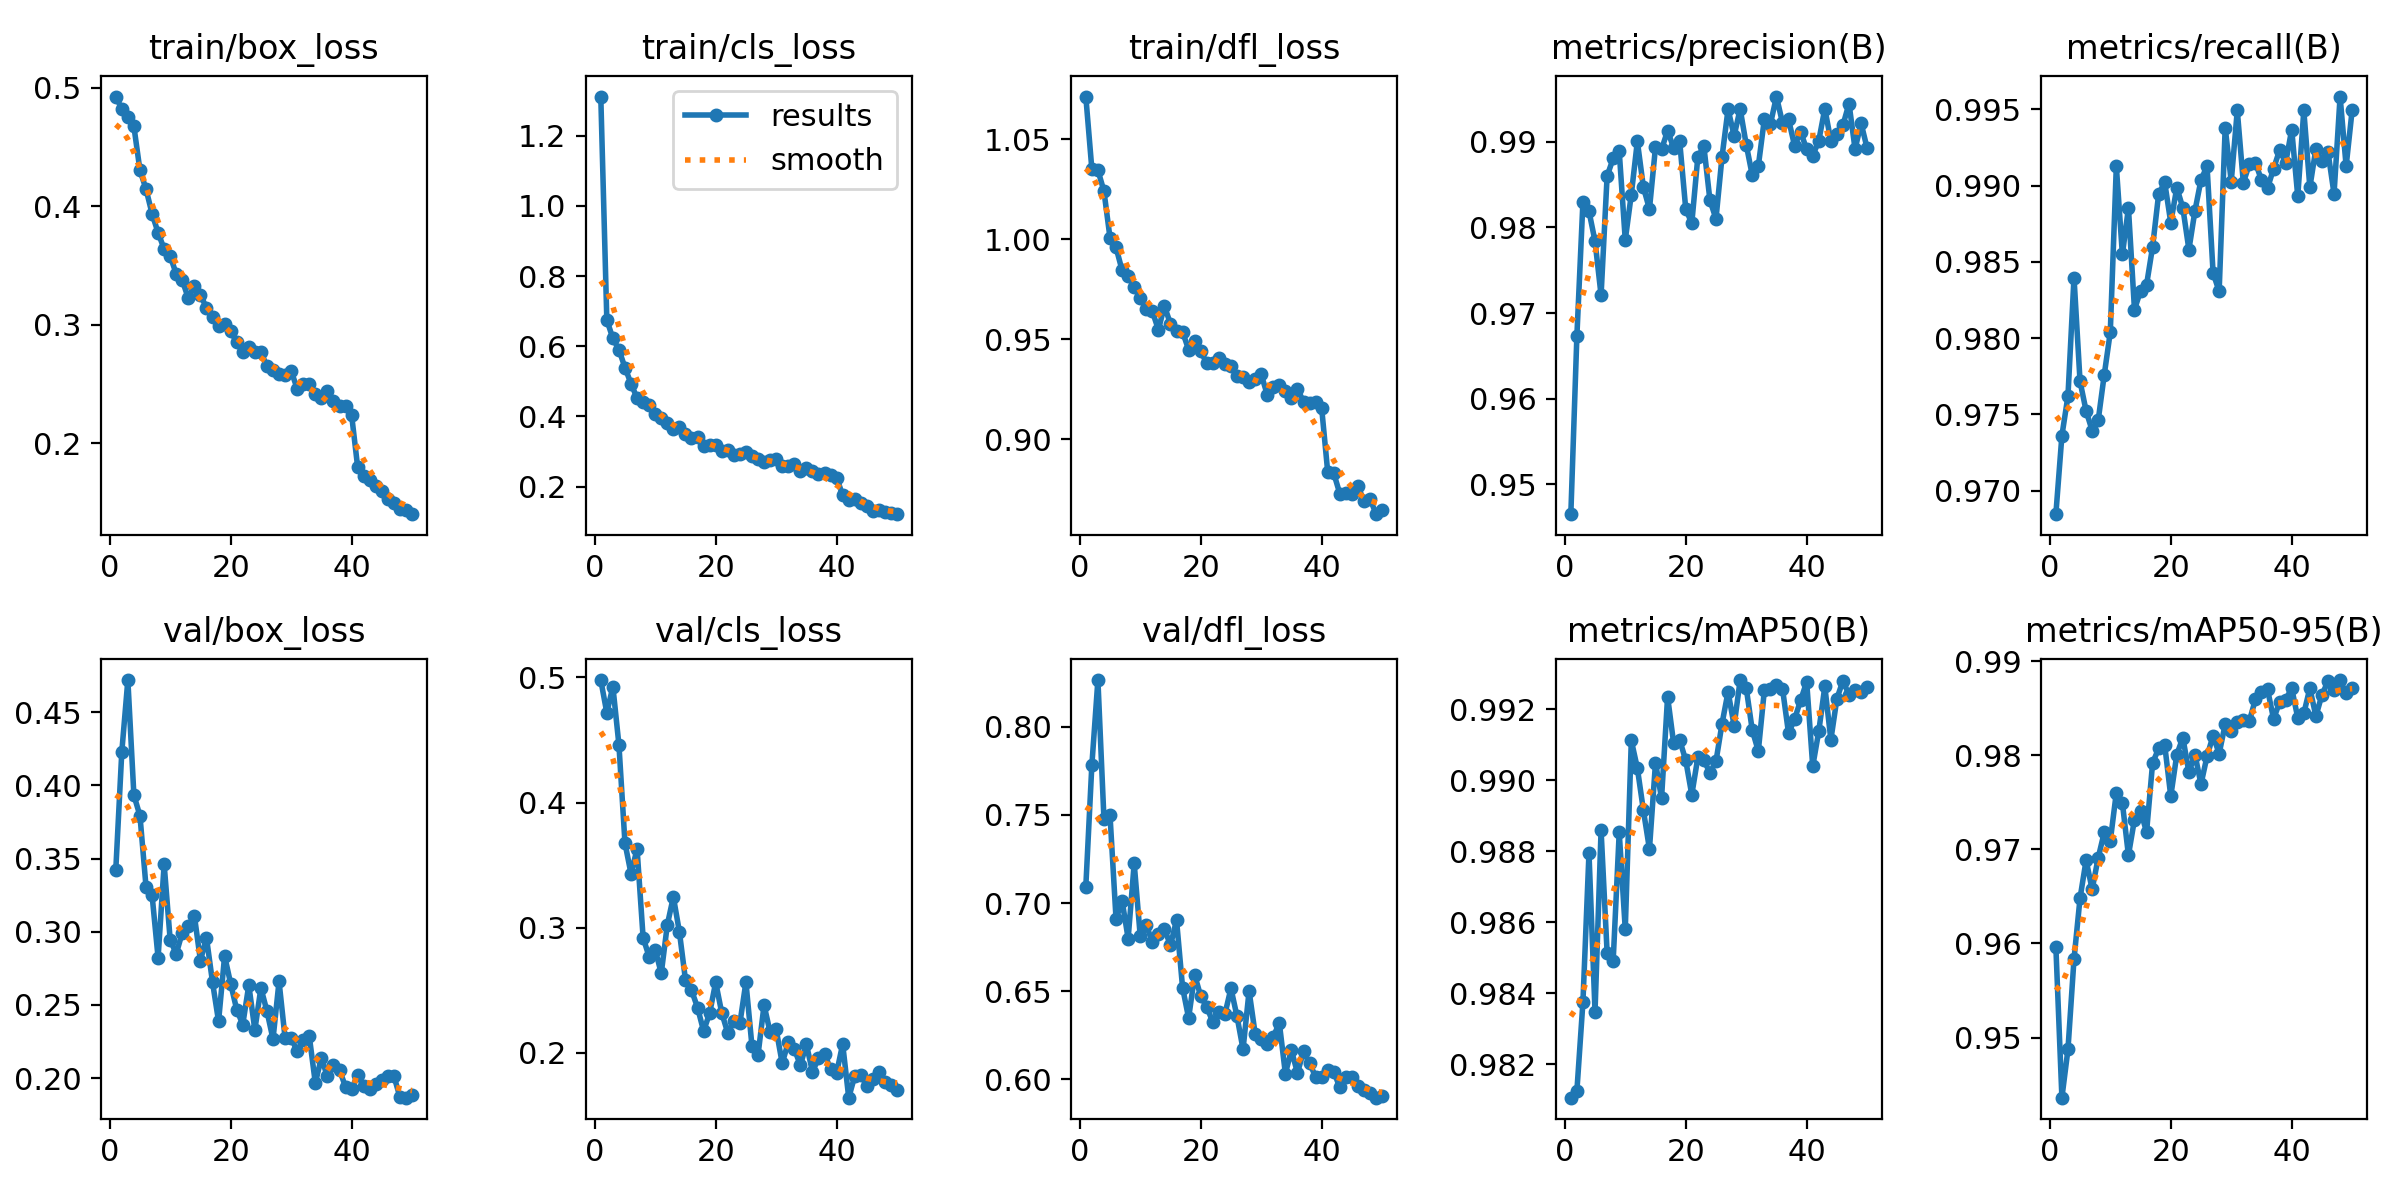

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


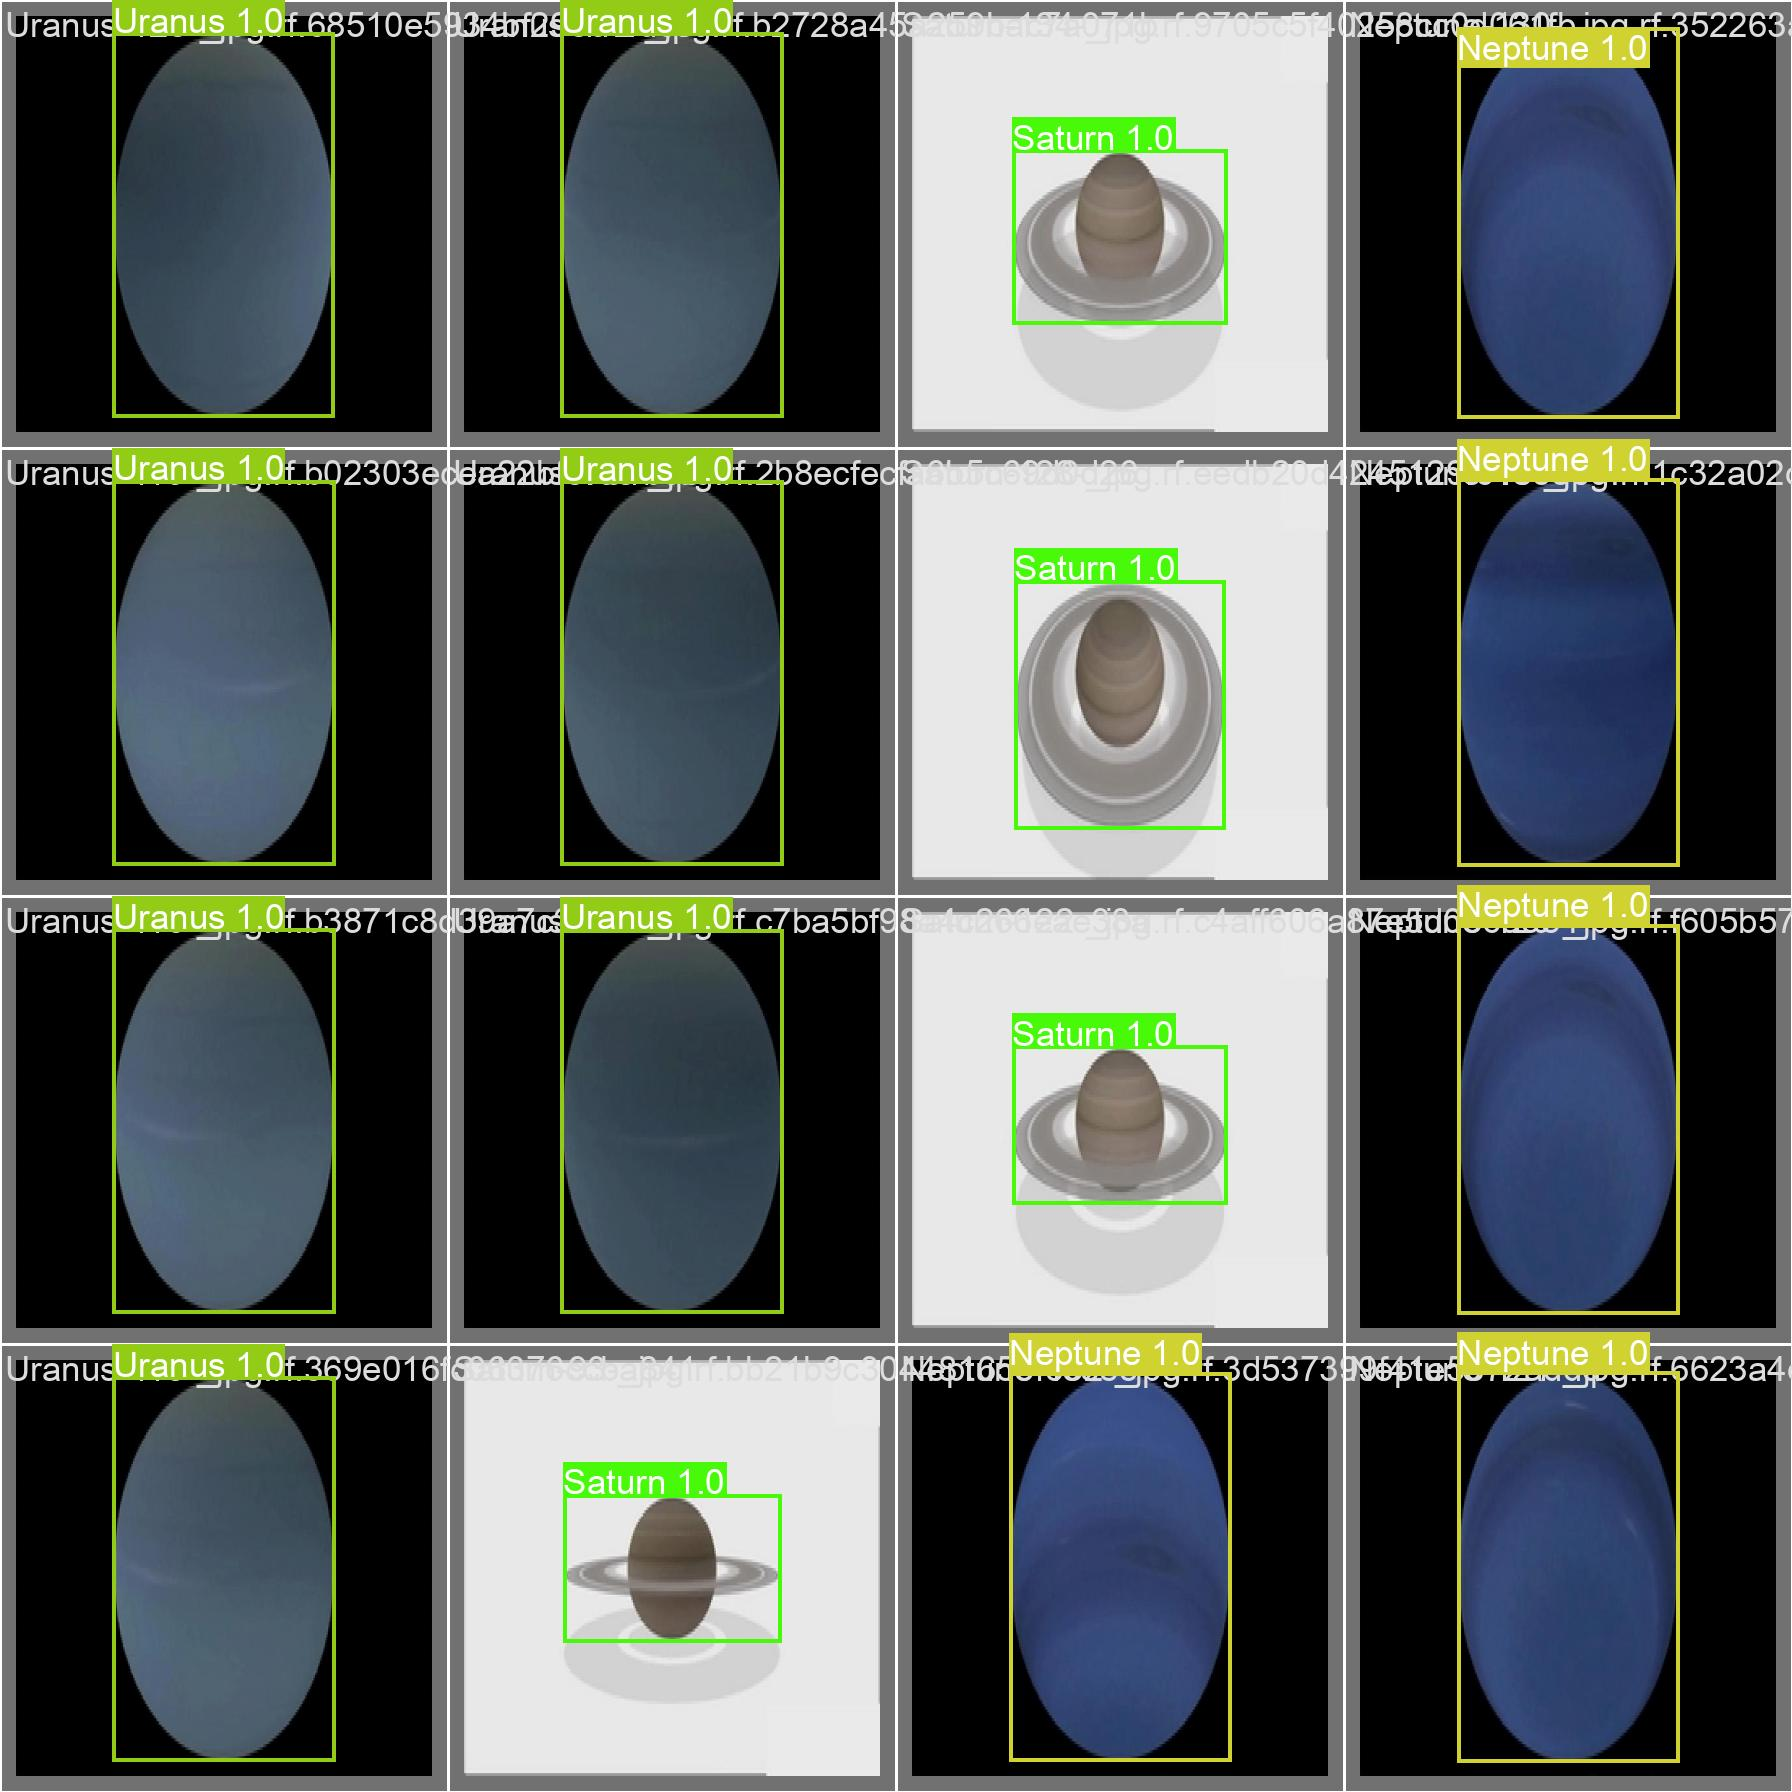

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Planet-Detection-10/valid/labels.cache... 341 images, 0 backgrounds, 0 corrupt: 100% 341/341 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:07<00:00,  3.14it/s]
                   all        341        341      0.989      0.996      0.993      0.988
                 Earth        341         29      0.982          1      0.995      0.989
               Jupiter        341         29      0.981          1      0.995      0.995
                  Mars        341         29      0.981          1      0.995      0.995
               Mercury        341         29          1          1      0.995      0.995
               Neptune        341         30          1      0.967      0.983      0.983
                Satu

## Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/185 /content/datasets/Planet-Detection-10/test/images/Earth-142-_jpg.rf.5e8051d1e3742175e6637d69fac38052.jpg: 416x416 1 Earth, 10.8ms
image 2/185 /content/datasets/Planet-Detection-10/test/images/Earth-18-_jpg.rf.5fe44df6f4c49e9e142bae0f290a3182.jpg: 416x416 1 Earth, 10.3ms
image 3/185 /content/datasets/Planet-Detection-10/test/images/Earth-29-_jpg.rf.a947c551d85d772728ce13049b6f2a40.jpg: 416x416 1 Earth, 11.3ms
image 4/185 /content/datasets/Planet-Detection-10/test/images/Earth-3-_jpg.rf.f5f27227bf2222d723ac3650e35fbd27.jpg: 416x416 1 Earth, 10.5ms
image 5/185 /content/datasets/Planet-Detection-10/test/images/Earth-32-_jpg.rf.cc562a3634b3bdcd81b0ddd805a54c4b.jpg: 416x416 1 Earth, 10.2ms
image 6/185 /content/datasets/Planet-Detection-10/test/images/Earth-41-_jp

## Displaying some results:

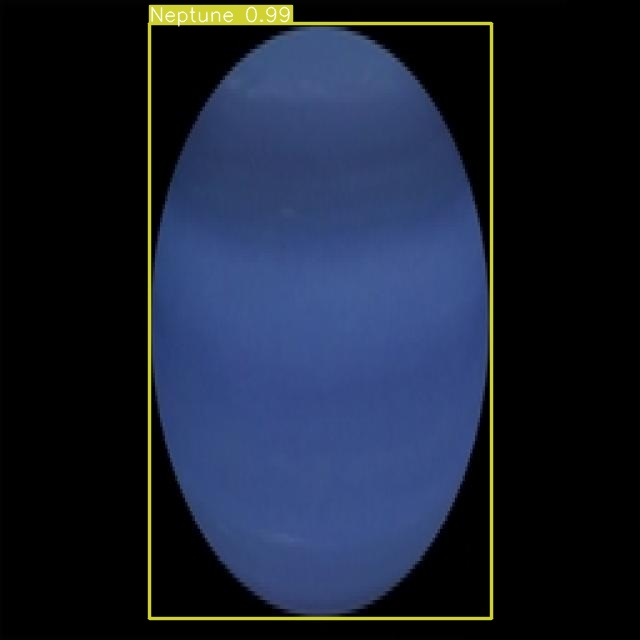

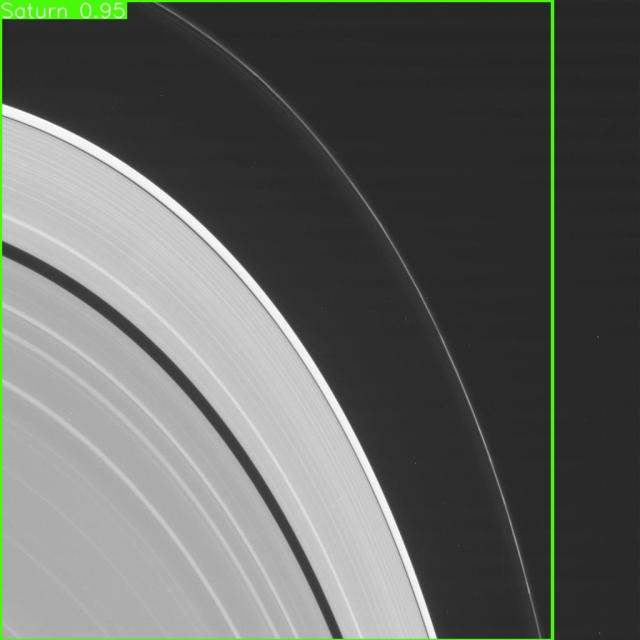

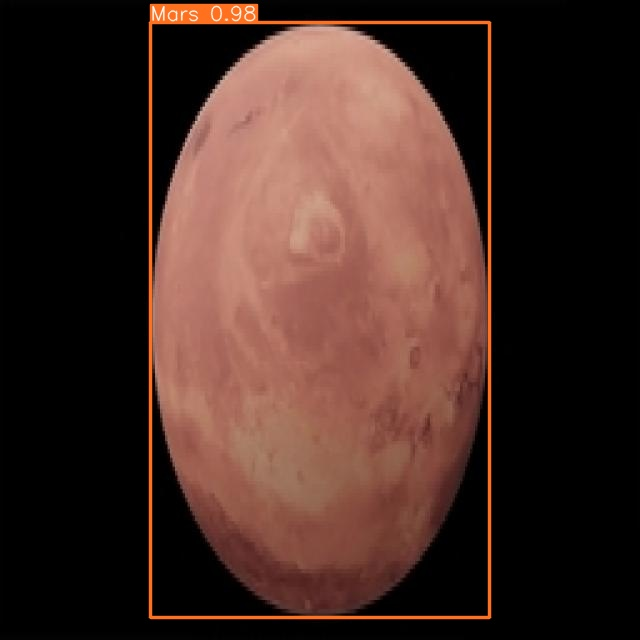

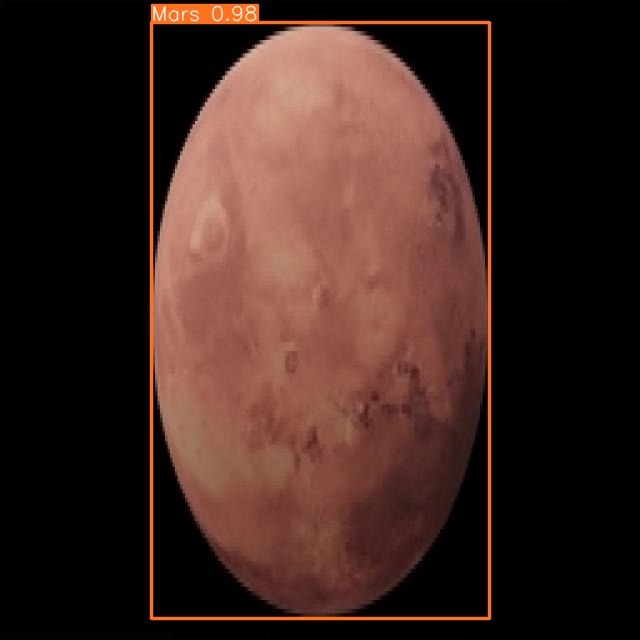

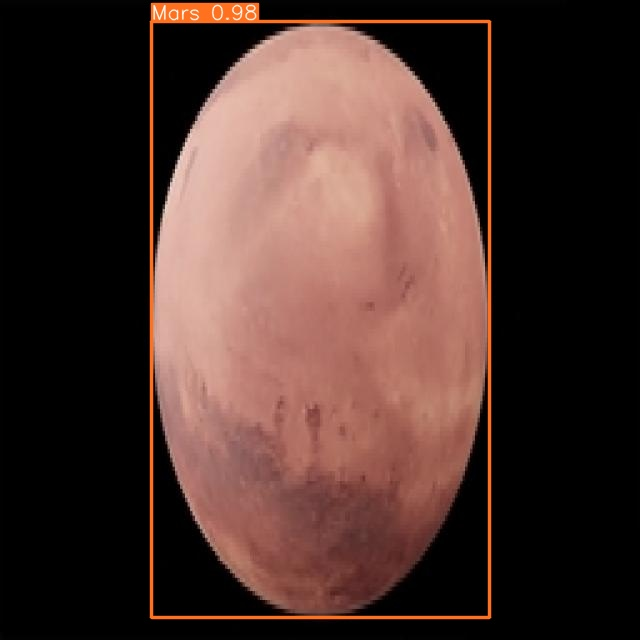

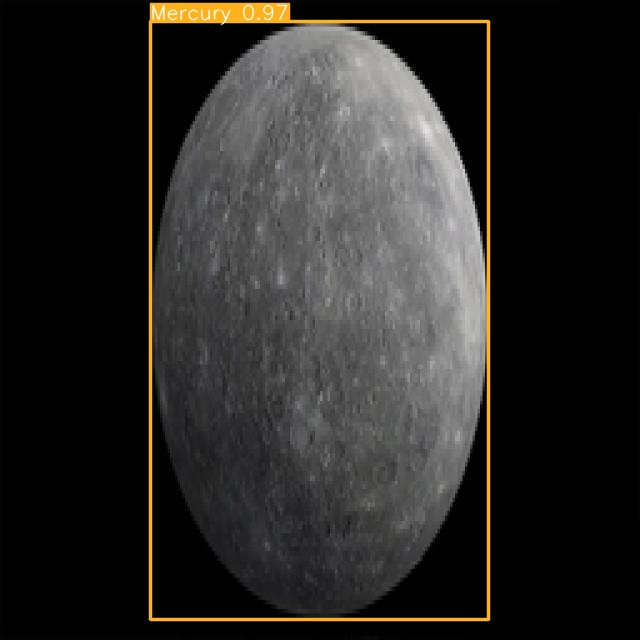

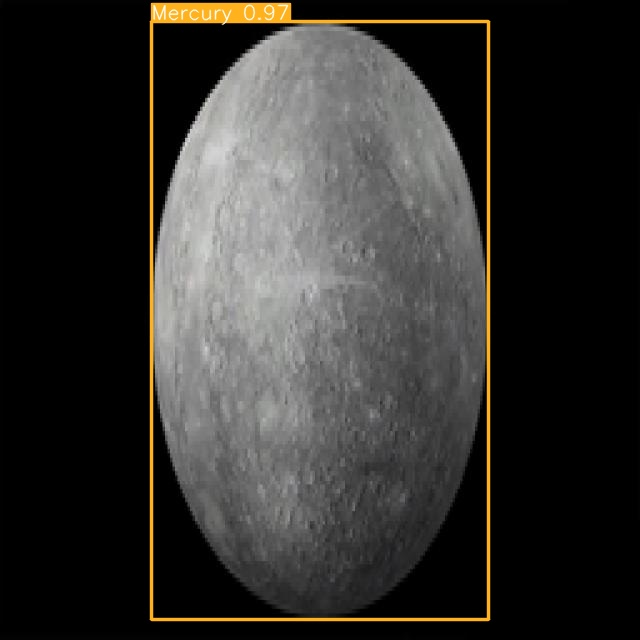

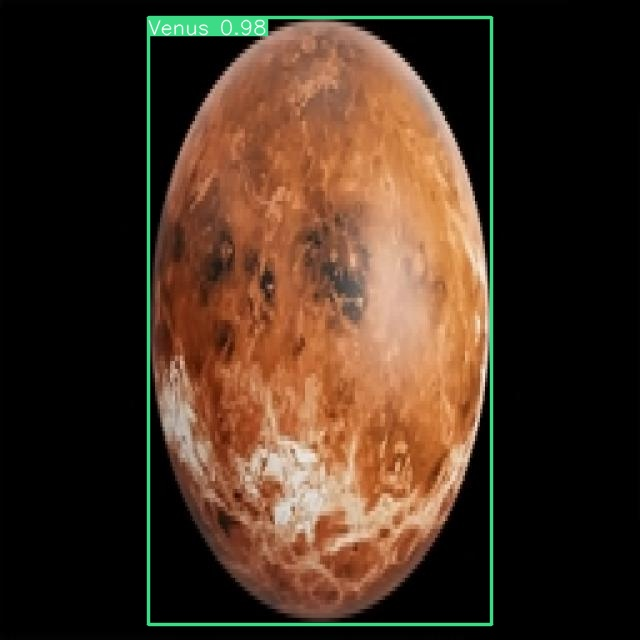

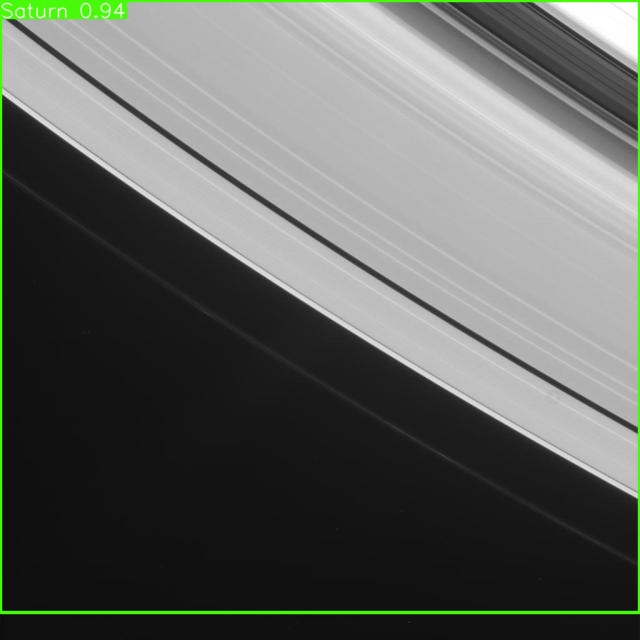

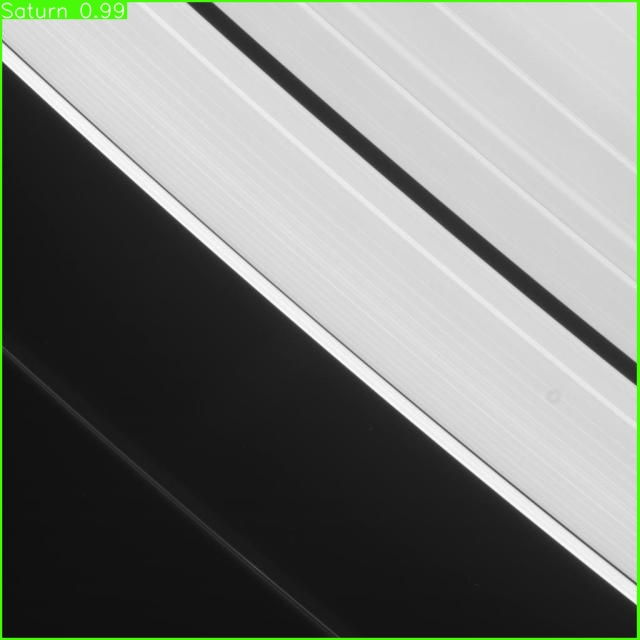

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
    display(Image(filename=image_path, width=600))
    print("\n")


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Save results in folder:

In [22]:
!cp -r /content/runs /content/drive/MyDrive/PlanetDetection

## Conclusion: 

Text here 